# Vehicle Model Simulation and Track Constraints Visualization
This notebook simulates the single-track vehicle model and visualizes the car trajectory along with track constraints $P_l(x)$ and $P_u(x)$.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import casadi as ca
from car_model import make_car_integrator

## Define Track Constraints $P_l(x)$ and $P_u(x)$

In [7]:
def Pl_vis(x):
    h2 = 3.5
    if x <= 44: return 0
    if x <= 44.5: return 4 * h2 * (x - 44) ** 3
    if x <= 45: return 4 * h2 * (x - 45) ** 3 + h2
    if x <= 70: return h2
    if x <= 70.5: return 4 * h2 * (70 - x) ** 3 + h2
    if x <= 71: return 4 * h2 * (71 - x) ** 3
    return 0

def Pu_vis(x):
    B = 1.5
    h1 = 1.1 * B + 0.25
    h2 = 3.5
    h3 = 1.2 * B + 3.75
    h4 = 1.3 * B + 0.25
    if x <= 15: return h1
    if x <= 15.5: return 4 * (h3 - h1) * (x - 15) ** 3 + h1
    if x <= 16: return 4 * (h3 - h1) * (x - 16) ** 3 + h3
    if x <= 94: return h3
    if x <= 94.5: return 4 * (h3 - h4) * (94 - x) ** 3 + h3
    if x <= 95: return 4 * (h3 - h4) * (95 - x) ** 3 + h4
    return h4

## Simulate Vehicle Trajectory

In [8]:
# Define simulation settings
N = 200
gear = 1
dt = 0.1
F = make_car_integrator(gear=gear, dt=dt)

# Initial state [cx, cy, v, delta, beta, psi, wz]
x0 = np.array([-30.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0])
# Constant control input [wd, FB, f]
u = np.array([0.05, 2000, 0.5])

# Run simulation
xs = [x0]
x = x0
for _ in range(N):
    x = F(x0=x, p=u)['xf'].full().flatten()
    xs.append(x)
xs = np.array(xs)

## Visualize Trajectory with Track Constraints

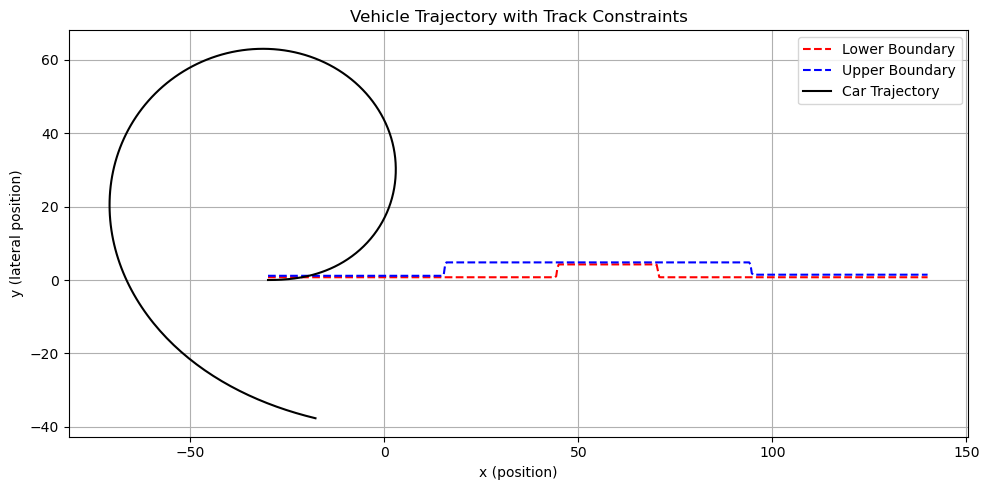

In [9]:
B = 1.5
x_plot = np.linspace(-30, 140, 500)
Pl_raw = np.array([Pl_vis(xi) for xi in x_plot])
Pu_raw = np.array([Pu_vis(xi) for xi in x_plot])
Pl_num = Pl_raw + B / 2
Pu_num = Pu_raw - B / 2

cx = xs[:, 0]
cy = xs[:, 1]

plt.figure(figsize=(10, 5))
plt.plot(x_plot, Pl_num, 'r--', label='Lower Boundary')
plt.plot(x_plot, Pu_num, 'b--', label='Upper Boundary')
plt.plot(cx, cy, 'k-', label='Car Trajectory')
plt.xlabel('x (position)')
plt.ylabel('y (lateral position)')
plt.title('Vehicle Trajectory with Track Constraints')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Interactive Visualization with Sliders

## ✅ Corrected Interactive Controls (One Plot Only)

In [ ]:

import ipywidgets as widgets
from ipywidgets import interactive, VBox
from IPython.display import display
import matplotlib.pyplot as plt

def simulate_and_plot(wd, FB, f):
    u = np.array([wd, FB, f])
    x = np.array([-30.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0])
    xs = [x]
    for _ in range(N):
        x = F(x0=x, p=u)['xf'].full().flatten()
        xs.append(x)
    xs = np.array(xs)
    cx = xs[:, 0]
    cy = xs[:, 1]

    plt.figure(figsize=(10, 5))
    plt.clf()
    plt.plot(x_plot, Pl_num, 'r--', label='Lower Boundary')
    plt.plot(x_plot, Pu_num, 'b--', label='Upper Boundary')
    plt.plot(cx, cy, 'k-', label='Car Trajectory')
    plt.xlabel('x (position)')
    plt.ylabel('y (lateral position)')
    plt.title('Trajectory with Variable Control Inputs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

wd_slider = widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=0.05, description='wd')
FB_slider = widgets.IntSlider(min=0, max=15000, step=500, value=2000, description='FB')
f_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=0.5, description='f')

ui = VBox([wd_slider, FB_slider, f_slider])
out = widgets.interactive_output(simulate_and_plot, {'wd': wd_slider, 'FB': FB_slider, 'f': f_slider})

display(ui, out)


Output()